## **Code playground for SDA Week_10**

# Graph

## Graph representation

Lets consider the following graph(V, E):

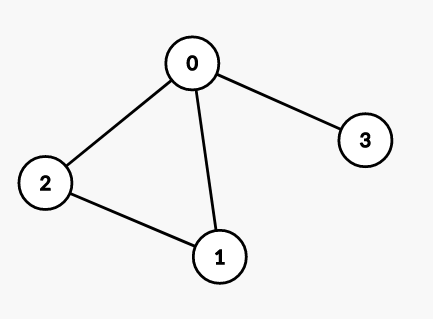

### Adjacency matrix

Requires *V<sup>2</sup>* memory. Used for dense graphs. Represented as boolean matrix where each cell is *1 (True)* if there is an edge between vertexes *i* and *j* and *0 (False)* otherwise.

In [ ]:
graph_matrix = [[0, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 0], [1, 0, 0, 0]]

## Adjacency list

Requires *V + E* memory. Used for sparse graphs. Represented as dictionary where each vertex is a key, with value - a set of neighboring vertexes. The set allows for *O(1)* check if there is an edge between two vertexes.

In [ ]:
graph_list = {0: set([1, 2, 3]), 1: set([0, 2]), 2: set([0, 1]), 3: set([0])}

## Breadth-first search

The algorithm traverses the graph starting from a given vertex. It first finds the vertexes that are neighbors with the starting one (*distance = 1*), then vertexes that are  at *distance = 2*, etc.

In [ ]:
graph_bfs = {0: set([1, 2, 3]), 1: set([0, 2, 4]), 2: set([0, 1]), 3: set([0, 5]), 4: set([1, 5]), 5: set([3, 4])}

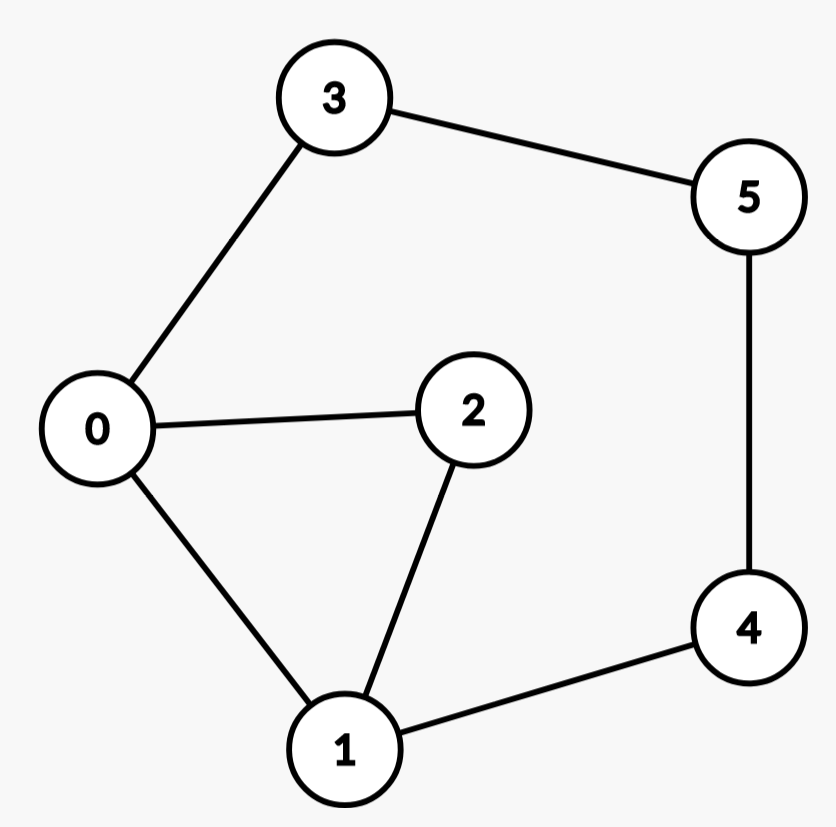

The algorithms uses a *queue* (*deque*) to keep track of the order in which the vertexes must be traversed and a *set* that saves the vertexes that have already been visited (where popped from the queue or are already in the queue). The time complexity is *O(V + E)*. 

In [ ]:
from collections import deque



def bfs(starting_vertex, graph):

    q = deque([starting_vertex])

    visited = set([starting_vertex])


    distance = 0


    while q:

        print(f"At distance {distance}:")


        for _ in range(len(q)):

            current = q.popleft()

            print(current)


            for neighbor in graph[current]:

                if neighbor not in visited:

                    visited.add(neighbor)

                    q.append(neighbor)


        distance += 1



starting_vertex = 0

bfs(starting_vertex, graph_bfs)

At distance 0:
0
At distance 1:
1
2
3
At distance 2:
4
5


BFS finds the shortest distance from a starting vertex to all others in an unweighted graph - when each edge has the same weight\ length. 

In [ ]:
from collections import deque


def bfs(starting_vertex, graph):
    q = deque([starting_vertex])
    visited = set([starting_vertex])

    distances = {v: -1 for v in graph.keys()}
    distance = 0

    while q:
        for _ in range(len(q)):
            current = q.popleft()
            distances[current] = distance

            for neighbor in graph[current]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    q.append(neighbor)

        distance += 1

    return distances


starting_vertex = 0
distances = bfs(starting_vertex, graph_bfs)
print(distances)

{0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 2}


## Depth-first search

The algorithm traverses the graph starting from a given vertex. It progresses as deeply as possible along each branch before backtracking.

In [ ]:
graph_dfs = {
    0: set([1, 2, 3]),
    1: set([0, 2, 4]),
    2: set([0, 1]),
    3: set([0, 5]),
    4: set([1, 5]),
    5: set([3, 4, 6]),
    6: set([5]),
}

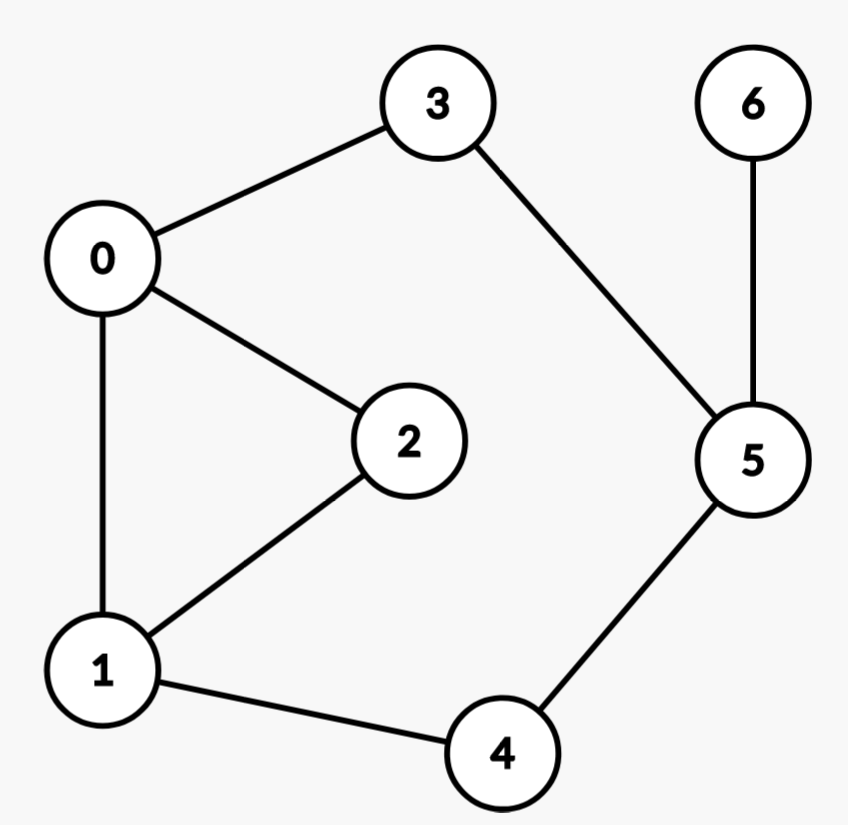

The algorithm keeps the order in which the vertexes must be traversed using *stack* (or implicitly through *recursion*). Again, a *set* is used to mark if a node is visited (was in the *stack* or is currently in the *stack*).

In [7]:
def dfs(current, visited, graph):
    print(current)

    for neighbor in graph[current]:
        if neighbor not in visited:
            visited.add(neighbor)
            dfs(neighbor, visited, graph)


starting_vertex = 0
visited = set([starting_vertex])
dfs(starting_vertex, visited, graph_dfs)

0
1
2
4
5
3
6


Using stack for DFS explicitly:

In [ ]:
def dfs_stack(starting_vertex, graph):
    stack = [starting_vertex]
    visited = set([starting_vertex])

    while stack:
        print(stack, stack[-1])
        current = stack.pop()

        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append(neighbor)


starting_vertex = 0
dfs_stack(starting_vertex, graph_dfs)

[0] 0
[1, 2, 3] 3
[1, 2, 5] 5
[1, 2, 4, 6] 6
[1, 2, 4] 4
[1, 2] 2
[1] 1


### Connected subgraphs

DFS and BFS can be used to count the number of connected subgraphs in disconnected graph.

In [ ]:
graph_disconnected = {
    0: set([1, 2]),
    1: set([0, 2]),
    2: set([3]),
    3: set([2]),
    4: set([5, 6]),
    5: set([4, 6]),
    6: set([4, 5]),
    7: set(),
}

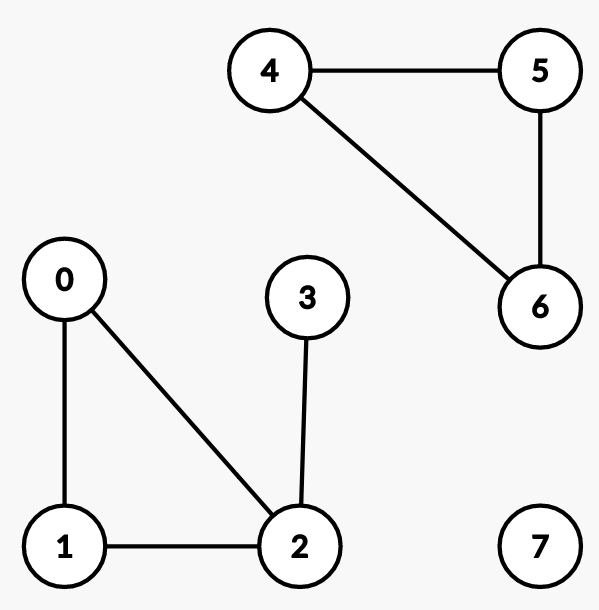

Each time a DFS/ BFS ends, all the visited vertexes belong to one subgraph. If we repeat the process for all vertexes that are left unvisited, we can find the number of subgraphs (connected components).

In [ ]:
def dfs(current, visited, graph):
    for neighbor in graph[current]:
        if neighbor not in visited:
            visited.add(neighbor)
            dfs(neighbor, visited, graph)


def count_areas(graph):
    count = 0
    visited = set()

    for vertex in graph:
        if vertex in visited:
            continue
        visited.add(vertex)

        dfs(vertex, visited, graph)
        count += 1

    return count


count_areas(graph_disconnected)

3

### Finding a cycle

DFS is useful for finding a cycle within a directed graph.

The following graph has a cycle:

In [11]:
graph_with_cycle = {
    1: set([2]),
    2: set([3, 5]),
    3: set([4]),
    4: set([1]),
}

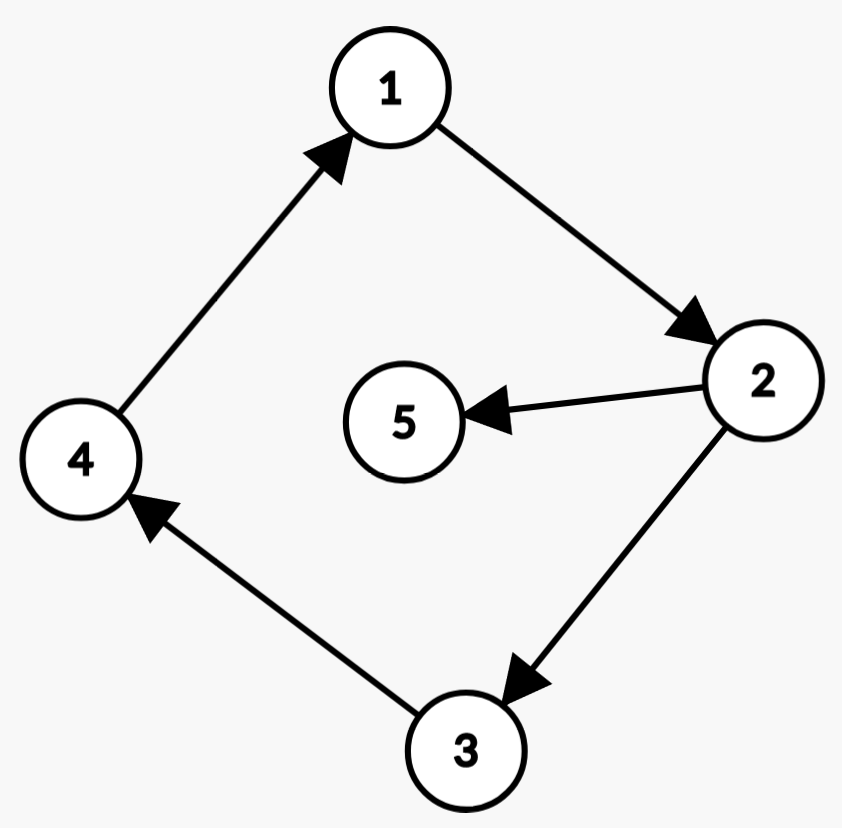

The following graph has no cycle:

In [12]:
graph_no_cycle = {
    1: set([2, 3]),
    2: set([4]),
    3: set([2, 4]),
    4: set([]),
}

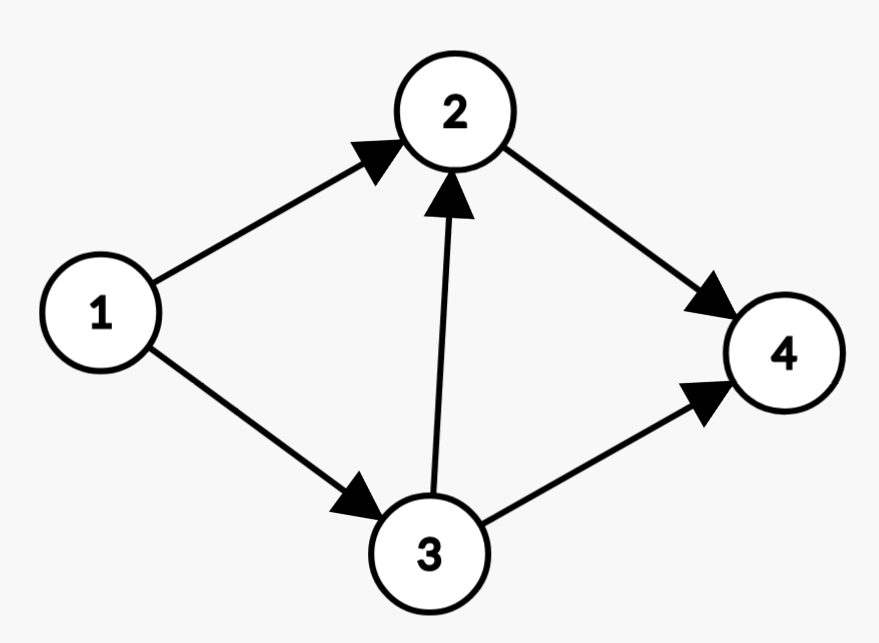

Main idea is to add another *set* that saves the vertexes which are currently in the recursion stack. When a vertex exits the recursion it is removed from the recursion set.
If the algorithm adds a vertex that is already in the recursion set, there is a cycle. If the vertex is not in the recursion set, it is marked as visited. Visited vertexes do not show cycles.

In [ ]:
def dfs_has_cycle(current, in_progress, visited, graph):
    in_progress.add(current)

    for neighbor in graph[current]:
        if neighbor in in_progress:
            return True

        if neighbor not in visited:
            visited.add(neighbor)
            if dfs_has_cycle(neighbor, in_progress, visited, graph):
                return True

    in_progress.remove(current)
    return False


def check_has_cycle(graph):
    visited = set()

    for vertex in graph:
        if vertex in visited:
            continue

        visited.add(vertex)
        in_progress = set()

        if dfs_has_cycle(vertex, in_progress, visited, graph):
            return True

    return False


print(check_has_cycle(graph_with_cycle))
print(check_has_cycle(graph_no_cycle))

True
False


### Topological sorting

Works only for ***DAG*** (*Directed Acyclic Graph*). Sorts the graph in such order that every vertex is before all his children. There may be more than one correct arrangement.

![Example of Topological Sorting of a graph](https://assets.leetcode.com/users/images/63bd7ad6-403c-42f1-b8bb-2ea41e42af9a_1613794080.8115625.png)

Another solution is [1, 4, 5, 6, 2, 3].

In [ ]:
graph_topological = {1: set([2, 4]), 2: set([3]), 3: set(), 4: set([2, 5, 6]), 5: set([6]), 6: set()}

#### Topological sorting using DFS:

The main idea is to add the vertexes to a stack when they exit the DFS recursion. This way the root is going to be added last. If the recursion starts from a vertex that is not the root, the DFS must be called more than one time. Since the root is always going to be at the top of the stack, the sorted graph is stack in reversed order.

In [ ]:
def topological_dfs(current, stack, visited, graph):
    visited.add(current)

    for neighbor in graph[current]:
        if neighbor not in visited:
            visited.add(neighbor)
            topological_dfs(neighbor, stack, visited, graph)

    stack.append(current)


def topological_sort(graph):
    stack = []
    visited = set()

    for vertex in graph:
        if vertex in visited:
            continue
        topological_dfs(vertex, stack, visited, graph)

    stack.reverse()
    return stack


topological_sort(graph_topological)

[1, 4, 5, 6, 2, 3]

#### Topological sorting using BFS:

Main idea is to find the *indegree* of every vertex (how many edges end in the given vertex). The vertexes with *indegree = 0* are the roots of the graph. Then we iterate starting from a root and remove each edge between the root and other unvisited vertexes - decreasing the *indegree*. When the *indegree* of an unvisited vertex equals 0, it is added in the queue (it has become a root) and is marked as visited.

In [ ]:
from collections import deque


def topological_bfs(graph):
    in_degree = {v: 0 for v in graph.keys()}

    for vertex in graph:
        for child in graph[vertex]:
            in_degree[child] += 1

    order = [v for v in graph.keys() if in_degree[v] == 0]

    q = deque(order)
    visited = set(order)

    while q:
        current = q.popleft()

        for neighbor in graph[current]:
            if neighbor not in visited:
                in_degree[neighbor] -= 1

            if in_degree[neighbor] == 0:
                visited.add(neighbor)
                q.append(neighbor)
                order.append(neighbor)

    return order


topological_bfs(graph_topological)

[1, 4, 2, 5, 3, 6]